In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
from bs4 import BeautifulSoup
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode
import pygwalker as pyg

In [3]:
team_urls = {'Manchester United':"https://www.transfermarkt.com/manchester-united/mitarbeiterhistorie/verein/985/personalie_id/0/plus/1", 
'Arsenal':"https://www.transfermarkt.com/arsenal-fc/mitarbeiterhistorie/verein/11/personalie_id/0/plus/1", 'Liverpool':"https://www.transfermarkt.com/liverpool-fc/mitarbeiterhistorie/verein/31/personalie_id/0/plus/1", 'Chelsea':"https://www.transfermarkt.com/chelsea-fc/mitarbeiterhistorie/verein/631/personalie_id/0/plus/1", 
'Tottenham Hotspur':"https://www.transfermarkt.com/tottenham-hotspur/mitarbeiterhistorie/verein/148/personalie_id/0/plus/1", 
'Manchester City':"https://www.transfermarkt.com/manchester-city/mitarbeiterhistorie/verein/281/personalie_id/0/plus/1", 'Everton':"https://www.transfermarkt.com/everton-fc/mitarbeiterhistorie/verein/29/personalie_id/0/plus/1", 
'Newcastle United':"https://www.transfermarkt.com/newcastle-united/mitarbeiterhistorie/verein/762/personalie_id/0/plus/1", 'Aston Villa':"https://www.transfermarkt.com/aston-villa/mitarbeiterhistorie/verein/405/personalie_id/0/plus/1",
'West Ham United':"https://www.transfermarkt.com/west-ham-united/mitarbeiterhistorie/verein/379/personalie_id/0/plus/1",
'Southampton':"https://www.transfermarkt.com/southampton-fc/mitarbeiterhistorie/verein/180/personalie_id/0/plus/1",
'Blackburn Rovers':"https://www.transfermarkt.com/blackburn-rovers/mitarbeiterhistorie/verein/164/personalie_id/0/plus/1",
'Leeds United':"https://www.transfermarkt.com/leeds-united/mitarbeiterhistorie/verein/399/personalie_id/0/plus/1",
'Leicester City':"https://www.transfermarkt.com/leicester-city/mitarbeiterhistorie/verein/1003/personalie_id/0/plus/1",
'Fulham':"https://www.transfermarkt.com/fulham-fc/mitarbeiterhistorie/verein/931/personalie_id/0/plus/1",
'Crystal Palace':"https://www.transfermarkt.com/crystal-palace/mitarbeiterhistorie/verein/873/personalie_id/0/plus/1",
'Middlesbrough':"https://www.transfermarkt.com/middlesbrough-fc/mitarbeiterhistorie/verein/641/personalie_id/0/plus/1",
'Sunderland':"https://www.transfermarkt.com/sunderland-afc/mitarbeiterhistorie/verein/289/personalie_id/0/plus/1",
'Bolton Wanderers':"https://www.transfermarkt.com/bolton-wanderers/mitarbeiterhistorie/verein/355/personalie_id/0/plus/1",
'West Bromwich Albion':"https://www.transfermarkt.com/west-bromwich-albion/mitarbeiterhistorie/verein/984/personalie_id/0/plus/1",
'Stoke City':"https://www.transfermarkt.com/stoke-city/mitarbeiterhistorie/verein/512/personalie_id/0/plus/1",
'Wolverhampton Wanderers':"https://www.transfermarkt.com/wolverhampton-wanderers/mitarbeiterhistorie/verein/543/personalie_id/0/plus/1",
'Sheffield Wednesday':"https://www.transfermarkt.com/sheffield-wednesday/mitarbeiterhistorie/verein/1035/personalie_id/0/plus/1",
'Coventry City':"https://www.transfermarkt.com/coventry-city/mitarbeiterhistorie/verein/990/personalie_id/0/plus/1",
'Norwich City':"https://www.transfermarkt.com/norwich-city/mitarbeiterhistorie/verein/1123/personalie_id/0/plus/1",
'Wimbledon':"https://www.transfermarkt.com/wimbledon-fc-2004-/mitarbeiterhistorie/verein/114309/personalie_id/0/plus/1",
'Charlton Athletic':"https://www.transfermarkt.com/charlton-athletic/mitarbeiterhistorie/verein/358/personalie_id/0/plus/1",
'Burnley':"https://www.transfermarkt.com/burnley-fc/mitarbeiterhistorie/verein/1132/personalie_id/0/plus/1",
'Wigan Athletic':"https://www.transfermarkt.com/wigan-athletic/mitarbeiterhistorie/verein/1071/personalie_id/0/plus/1",
'Swansea City':"https://www.transfermarkt.com/swansea-city/mitarbeiterhistorie/verein/2288/personalie_id/0/plus/1",
'Bournemouth':"https://www.transfermarkt.com/afc-bournemouth/mitarbeiterhistorie/verein/989/personalie_id/0/plus/1",
'Queens Park Rangers':"https://www.transfermarkt.com/queens-park-rangers/mitarbeiterhistorie/verein/1039/personalie_id/0/plus/1",
'Brighton & Hove Albion':"https://www.transfermarkt.com/brighton-amp-hove-albion/mitarbeiterhistorie/verein/1237/personalie_id/0/plus/1",
'Nottingham Forest':"https://www.transfermarkt.com/nottingham-forest/mitarbeiterhistorie/verein/703/personalie_id/0/plus/1",
'Portsmouth':"https://www.transfermarkt.com/portsmouth-fc/mitarbeiterhistorie/verein/1020/personalie_id/0/plus/1",
'Birmingham City':"https://www.transfermarkt.com/birmingham-city/mitarbeiterhistorie/verein/337/personalie_id/0/plus/1",
'Watford':"https://www.transfermarkt.com/watford-fc/mitarbeiterhistorie/verein/1010/personalie_id/0/plus/1",
'Derby County':"https://www.transfermarkt.com/derby-county/mitarbeiterhistorie/verein/22/personalie_id/0/plus/1",
'Ipswich Town':"https://www.transfermarkt.com/ipswich-town/mitarbeiterhistorie/verein/677/personalie_id/0/plus/1",
'Sheffield United':"https://www.transfermarkt.com/sheffield-united/mitarbeiterhistorie/verein/350/personalie_id/0/plus/1",
'Hull City':"https://www.transfermarkt.com/hull-city/mitarbeiterhistorie/verein/3008/personalie_id/0/plus/1",
'Brentford':"https://www.transfermarkt.com/brentford-fc/mitarbeiterhistorie/verein/1148/personalie_id/0/plus/1",
'Reading':"https://www.transfermarkt.com/reading-fc/mitarbeiterhistorie/verein/1032/personalie_id/0/plus/1",
'Oldham Athletic':"https://www.transfermarkt.com/oldham-athletic/mitarbeiterhistorie/verein/1078/personalie_id/0/plus/1",
'Cardiff City':"https://www.transfermarkt.com/cardiff-city/mitarbeiterhistorie/verein/603/personalie_id/0/plus/1",
'Bradford City':"https://www.transfermarkt.com/bradford-city/mitarbeiterhistorie/verein/1027/personalie_id/0/plus/1",
'Huddersfield Town':"https://www.transfermarkt.com/huddersfield-town/mitarbeiterhistorie/verein/1110/personalie_id/0/plus/1",
'Barnsley':"https://www.transfermarkt.com/barnsley-fc/mitarbeiterhistorie/verein/349/personalie_id/0/plus/1",
'Blackpool':"https://www.transfermarkt.com/blackpool-fc/mitarbeiterhistorie/verein/1181/personalie_id/0/plus/1",
'Luton Town':"https://www.transfermarkt.com/luton-town/mitarbeiterhistorie/verein/1031/personalie_id/0/plus/1",
'Swindon Town':"https://www.transfermarkt.com/swindon-town/mitarbeiterhistorie/verein/352/personalie_id/0/plus/1"}

In [4]:
all_data = []

In [5]:
def parse_date(date_string):
    try:
        return datetime.strptime(date_string, '%b %d, %Y')
    except ValueError:
        return None

In [6]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [7]:
def scrape_manager_history(team_name, url):
    driver.get(url)
    
    try:
        # Wait until the table element is present on the page (max wait: 10 seconds)
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'items'))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        table = soup.find('table', class_='items').find('tbody')
        
        if table is None:
            print(f"Table not found for {team_name}, skipping...")
            return
        
        rows = table.find_all('tr', class_=['odd', 'even'])

        cutoff_date = datetime(1992, 8, 15)

        for row in rows:
            name_td = row.find('td', class_='hauptlink')
            if name_td:
                name = name_td.text.strip()
            else:
                continue

            zentriert_tds = row.find_all('td', class_='zentriert')
            if len(zentriert_tds) < 6:
                continue

            appointed_td = zentriert_tds[1]
            appointed_date_str = appointed_td.text.strip()
            appointed_date = parse_date(appointed_date_str)

            end_td = zentriert_tds[2]
            end_date_str = end_td.text.strip() if end_td.text.strip() else 'Still in job'
            end_date = parse_date(end_date_str) if end_date_str != 'Still in job' else datetime.today()

            time_in_post_td = row.find('td', class_='rechts')
            time_in_post_val = time_in_post_td.text.strip() if time_in_post_td and time_in_post_td.text.strip() else '0'

            matches_val = zentriert_tds[3].find('a').text.strip() if zentriert_tds[3].find('a') else '0'
            wins_val = zentriert_tds[4].text.strip() if zentriert_tds[4].text.strip() else '0'
            draws_val = zentriert_tds[5].text.strip() if zentriert_tds[5].text.strip() else '0'
            losses_val = zentriert_tds[6].text.strip() if zentriert_tds[6].text.strip() else '0'
            ppg_val = zentriert_tds[7].text.strip() if len(zentriert_tds) > 7 and zentriert_tds[7].text.strip() else '0'

            if appointed_date and end_date:
                if appointed_date <= cutoff_date <= end_date or appointed_date > cutoff_date:
                    all_data.append({
                        'Team': team_name,
                        'Name': name,
                        'Appointed': appointed_date_str,
                        'End of Time': end_date_str,
                        'Time in Post': time_in_post_val,
                        'Matches': matches_val,
                        'Wins': wins_val,
                        'Draws': draws_val,
                        'Losses': losses_val,
                        'PPG': ppg_val
                    })

    except Exception as e:
        print(f"An error occurred while processing {team_name}: {e}")

In [8]:
for team_name, url in team_urls.items():
    scrape_manager_history(team_name, url)

In [9]:
df = pd.DataFrame(all_data)

In [10]:
df.head()

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
0,Manchester United,Erik ten Hag,"Jul 1, 2022",Still in job,02 years 03 months 02 days,123,71,17,35,1.87
1,Manchester United,Ralf Rangnick,"Dec 3, 2021","May 31, 2022",05 months 28 days,29,11,9,9,1.45
2,Manchester United,Michael Carrick,"Nov 21, 2021","Dec 3, 2021",12 days,3,2,1,-,2.33
3,Manchester United,Ole Gunnar Solskjær,"Mar 28, 2019","Nov 21, 2021",02 years 07 months 24 days,149,78,33,38,1.79
4,Manchester United,Ole Gunnar Solskjær,"Dec 19, 2018","Mar 28, 2019",03 months 09 days,19,14,2,3,2.32


In [11]:
df.tail()

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
1387,Swindon Town,Colin Todd,"May 4, 2000","Nov 1, 2000",05 months 28 days,16,4,4,8,1.00
1388,Swindon Town,Jimmy Quinn,"Oct 2, 1998","May 2, 2000",01 year 07 months 00 days,81,19,19,43,0.94
1389,Swindon Town,Steve McMahon,"Nov 28, 1994","Sep 23, 1998",03 years 09 months 26 days,106,31,22,53,1.08
1390,Swindon Town,John Gorman,"Jul 1, 1993","Nov 21, 1994",01 year 04 months 21 days,42,5,15,22,0.71
1391,Swindon Town,Glenn Hoddle,"Apr 4, 1991","Jun 4, 1993",02 years 02 months 00 days,5,2,1,2,1.40


In [12]:
df.loc[df['Team']=='Wimbledon']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
642,Wimbledon,Stuart Murdoch,"May 1, 2002","Jun 30, 2004",02 years 01 month 30 days,101,30,17,54,1.06
643,Wimbledon,Terry Burton,"May 1, 2000","Apr 25, 2002",01 year 11 months 25 days,105,38,36,31,1.43
644,Wimbledon,Egil Olsen,"Jul 1, 1999","May 1, 2000",10 months 00 days,43,11,12,20,1.05
645,Wimbledon,Joe Kinnear,"Jan 19, 1992","Jun 9, 1999",07 years 04 months 21 days,318,109,92,117,1.32


In [13]:
df['Team'].unique()

array(['Manchester United', 'Arsenal', 'Liverpool', 'Chelsea',
       'Tottenham Hotspur', 'Manchester City', 'Everton',
       'Newcastle United', 'Aston Villa', 'West Ham United',
       'Southampton', 'Blackburn Rovers', 'Leeds United',
       'Leicester City', 'Fulham', 'Crystal Palace', 'Middlesbrough',
       'Sunderland', 'Bolton Wanderers', 'West Bromwich Albion',
       'Stoke City', 'Wolverhampton Wanderers', 'Sheffield Wednesday',
       'Coventry City', 'Norwich City', 'Wimbledon', 'Charlton Athletic',
       'Burnley', 'Wigan Athletic', 'Swansea City', 'Bournemouth',
       'Queens Park Rangers', 'Brighton & Hove Albion',
       'Nottingham Forest', 'Portsmouth', 'Birmingham City', 'Watford',
       'Derby County', 'Ipswich Town', 'Sheffield United', 'Hull City',
       'Brentford', 'Reading', 'Oldham Athletic', 'Cardiff City',
       'Bradford City', 'Huddersfield Town', 'Barnsley', 'Blackpool',
       'Luton Town', 'Swindon Town'], dtype=object)

In [14]:
df.shape

(1392, 10)

In [15]:
df.loc[df['Team']=='Everton']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
98,Everton,Sean Dyche,"Jan 30, 2023",Still in job,01 year 08 months 03 days,70,24,17,29,1.27
99,Everton,Leighton Baines,"Jan 24, 2023","Jan 29, 2023",05 days,0,-,-,-,-
100,Everton,Paul Tait,"Jan 24, 2023","Jan 29, 2023",05 days,0,-,-,-,-
101,Everton,Frank Lampard,"Jan 31, 2022","Jan 23, 2023",11 months 23 days,44,12,8,24,1.00
102,Everton,Duncan Ferguson,"Jan 18, 2022","Jan 30, 2022",12 days,1,-,-,1,0.00
103,Everton,Rafael Benítez,"Jul 1, 2021","Jan 16, 2022",06 months 16 days,22,7,4,11,1.14
104,Everton,Carlo Ancelotti,"Dec 22, 2019","Jun 30, 2021",01 year 06 months 08 days,67,31,14,22,1.60
105,Everton,Duncan Ferguson,"Dec 5, 2019","Dec 21, 2019",16 days,4,1,2,1,1.25
106,Everton,Marco Silva,"May 31, 2018","Dec 5, 2019",01 year 06 months 04 days,60,24,11,25,1.38
107,Everton,Sam Allardyce,"Nov 30, 2017","May 16, 2018",05 months 16 days,26,10,7,9,1.42


In [16]:
df_filtered = pd.read_csv("EPL Managers Only.csv")

In [17]:
df_merged = pd.merge(df, df_filtered, on=['Team', 'Name', 'Appointed', 'End of Time'], how='inner')

In [18]:
df_merged.rename(columns={
    'Team_x': 'Team', 
    'Appointed_x': 'Appointed', 
    'End of Time_x': 'End of Time',
}, inplace=True)

In [19]:
df_merged.drop(columns=['Premier League Season'], inplace=True)

In [20]:
columns_to_keep = ['Team', 'Name', 'Appointed', 'End of Time', 'Time in Post', 'Matches', 'Wins', 'Draws', 'Losses', 'PPG']

In [21]:
df_merged_cleaned = df_merged[columns_to_keep]

In [22]:
df_merged_cleaned.head(34)

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
0,Manchester United,Erik ten Hag,"Jul 1, 2022",Still in job,02 years 03 months 02 days,123,71,17,35,1.87
1,Manchester United,Ralf Rangnick,"Dec 3, 2021","May 31, 2022",05 months 28 days,29,11,9,9,1.45
2,Manchester United,Michael Carrick,"Nov 21, 2021","Dec 3, 2021",12 days,3,2,1,-,2.33
3,Manchester United,Ole Gunnar Solskjær,"Mar 28, 2019","Nov 21, 2021",02 years 07 months 24 days,149,78,33,38,1.79
4,Manchester United,Ole Gunnar Solskjær,"Dec 19, 2018","Mar 28, 2019",03 months 09 days,19,14,2,3,2.32
5,Manchester United,José Mourinho,"Jul 1, 2016","Dec 18, 2018",02 years 05 months 17 days,144,84,31,29,1.97
6,Manchester United,Louis van Gaal,"Jul 14, 2014","May 23, 2016",01 year 10 months 09 days,103,54,24,25,1.81
7,Manchester United,Ryan Giggs,"Apr 23, 2014","Jun 30, 2014",02 months 07 days,4,2,1,1,1.75
8,Manchester United,David Moyes,"Jul 1, 2013","Apr 22, 2014",09 months 22 days,51,26,10,15,1.73
9,Manchester United,Sir Alex Ferguson,"Nov 6, 1986","Jun 30, 2013",26 years 07 months 24 days,1490,895,323,272,2.02


In [23]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Everton']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
92,Everton,Sean Dyche,"Jan 30, 2023",Still in job,01 year 08 months 03 days,70,24,17,29,1.27
93,Everton,Leighton Baines,"Jan 24, 2023","Jan 29, 2023",05 days,0,-,-,-,-
94,Everton,Paul Tait,"Jan 24, 2023","Jan 29, 2023",05 days,0,-,-,-,-
95,Everton,Frank Lampard,"Jan 31, 2022","Jan 23, 2023",11 months 23 days,44,12,8,24,1.00
96,Everton,Duncan Ferguson,"Jan 18, 2022","Jan 30, 2022",12 days,1,-,-,1,0.00
97,Everton,Rafael Benítez,"Jul 1, 2021","Jan 16, 2022",06 months 16 days,22,7,4,11,1.14
98,Everton,Carlo Ancelotti,"Dec 22, 2019","Jun 30, 2021",01 year 06 months 08 days,67,31,14,22,1.60
99,Everton,Duncan Ferguson,"Dec 5, 2019","Dec 21, 2019",16 days,4,1,2,1,1.25
100,Everton,Marco Silva,"May 31, 2018","Dec 5, 2019",01 year 06 months 04 days,60,24,11,25,1.38
101,Everton,Sam Allardyce,"Nov 30, 2017","May 16, 2018",05 months 16 days,26,10,7,9,1.42


In [24]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Wimbledon']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
363,Wimbledon,Terry Burton,"May 1, 2000","Apr 25, 2002",01 year 11 months 25 days,105,38,36,31,1.43
364,Wimbledon,Egil Olsen,"Jul 1, 1999","May 1, 2000",10 months 00 days,43,11,12,20,1.05
365,Wimbledon,Joe Kinnear,"Jan 19, 1992","Jun 9, 1999",07 years 04 months 21 days,318,109,92,117,1.32


In [25]:
df_merged_cleaned.shape

(487, 10)

In [26]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Ipswich Town']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
452,Ipswich Town,George Burley,"Dec 28, 1994","Oct 11, 2002",07 years 09 months 13 days,337,153,77,107,1.59
453,Ipswich Town,Paul Goddard,"Dec 5, 1994","Dec 28, 1994",23 days,3,-,2,1,0.67
454,Ipswich Town,John Lyall,"May 11, 1990","Dec 5, 1994",04 years 06 months 24 days,112,27,37,48,1.05


In [27]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Manchester United']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
0,Manchester United,Erik ten Hag,"Jul 1, 2022",Still in job,02 years 03 months 02 days,123,71,17,35,1.87
1,Manchester United,Ralf Rangnick,"Dec 3, 2021","May 31, 2022",05 months 28 days,29,11,9,9,1.45
2,Manchester United,Michael Carrick,"Nov 21, 2021","Dec 3, 2021",12 days,3,2,1,-,2.33
3,Manchester United,Ole Gunnar Solskjær,"Mar 28, 2019","Nov 21, 2021",02 years 07 months 24 days,149,78,33,38,1.79
4,Manchester United,Ole Gunnar Solskjær,"Dec 19, 2018","Mar 28, 2019",03 months 09 days,19,14,2,3,2.32
5,Manchester United,José Mourinho,"Jul 1, 2016","Dec 18, 2018",02 years 05 months 17 days,144,84,31,29,1.97
6,Manchester United,Louis van Gaal,"Jul 14, 2014","May 23, 2016",01 year 10 months 09 days,103,54,24,25,1.81
7,Manchester United,Ryan Giggs,"Apr 23, 2014","Jun 30, 2014",02 months 07 days,4,2,1,1,1.75
8,Manchester United,David Moyes,"Jul 1, 2013","Apr 22, 2014",09 months 22 days,51,26,10,15,1.73
9,Manchester United,Sir Alex Ferguson,"Nov 6, 1986","Jun 30, 2013",26 years 07 months 24 days,1490,895,323,272,2.02


In [28]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Cardiff City']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
473,Cardiff City,Neil Warnock,"Oct 5, 2016","Nov 11, 2019",03 years 01 month 06 days,144,59,29,56,1.43
474,Cardiff City,Ole Gunnar Solskjær,"Jan 2, 2014","Sep 18, 2014",08 months 16 days,30,9,5,16,1.07
475,Cardiff City,David Kerslake,"Dec 28, 2013","Jan 2, 2014",05 days,2,-,1,1,0.50
476,Cardiff City,Malky Mackay,"Jul 1, 2011","Dec 27, 2013",02 years 05 months 26 days,125,55,35,35,1.60


In [29]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Chelsea']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
27,Chelsea,Mauricio Pochettino,"Jul 1, 2023","Jun 30, 2024",11 months 30 days,51,27,10,14,1.78
28,Chelsea,Frank Lampard,"Apr 6, 2023","Jun 30, 2023",02 months 24 days,11,1,2,8,0.45
29,Chelsea,Bruno Saltor,"Apr 3, 2023","Apr 5, 2023",02 days,1,-,1,-,1.00
30,Chelsea,Graham Potter,"Sep 8, 2022","Apr 2, 2023",06 months 25 days,31,12,8,11,1.42
31,Chelsea,Thomas Tuchel,"Jan 26, 2021","Sep 7, 2022",01 year 07 months 12 days,100,63,19,18,2.08
32,Chelsea,Frank Lampard,"Jul 4, 2019","Jan 25, 2021",01 year 06 months 21 days,84,44,15,25,1.75
33,Chelsea,Maurizio Sarri,"Jul 14, 2018","Jun 30, 2019",11 months 16 days,63,40,11,12,2.08
34,Chelsea,Antonio Conte,"Jul 1, 2016","Jul 13, 2018",02 years 12 days,106,70,15,21,2.12
35,Chelsea,Guus Hiddink,"Dec 21, 2015","Jun 30, 2016",06 months 09 days,27,10,11,6,1.52
36,Chelsea,José Mourinho,"Jul 1, 2013","Dec 17, 2015",02 years 05 months 16 days,136,80,27,29,1.96


In [30]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Tottenham Hotspur']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
53,Tottenham Hotspur,Ange Postecoglou,"Jul 1, 2023",Still in job,01 year 03 months 02 days,49,26,7,16,1.73
54,Tottenham Hotspur,Ryan Mason,"Apr 24, 2023","Jun 30, 2023",02 months 06 days,6,2,1,3,1.17
55,Tottenham Hotspur,Cristian Stellini,"Mar 26, 2023","Apr 24, 2023",29 days,4,1,1,2,1.00
56,Tottenham Hotspur,Antonio Conte,"Nov 2, 2021","Mar 26, 2023",01 year 04 months 24 days,76,41,12,23,1.78
57,Tottenham Hotspur,Nuno Espírito Santo,"Jul 1, 2021","Nov 1, 2021",04 months 01 day,17,9,1,7,1.65
58,Tottenham Hotspur,Ryan Mason,"Apr 20, 2021","Jun 30, 2021",02 months 10 days,7,4,-,3,1.71
59,Tottenham Hotspur,José Mourinho,"Nov 20, 2019","Apr 19, 2021",01 year 04 months 30 days,86,45,17,24,1.77
60,Tottenham Hotspur,Mauricio Pochettino,"Jul 1, 2014","Nov 19, 2019",05 years 04 months 19 days,293,160,60,73,1.84
61,Tottenham Hotspur,Tim Sherwood,"Dec 23, 2013","May 13, 2014",04 months 20 days,26,13,4,9,1.65
62,Tottenham Hotspur,Tim Sherwood,"Dec 17, 2013","Dec 23, 2013",06 days,2,1,-,1,1.50


In [31]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Arsenal']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
10,Arsenal,Mikel Arteta,"Dec 22, 2019",Still in job,04 years 09 months 11 days,240,146,37,57,1.98
11,Arsenal,Freddie Ljungberg,"Nov 29, 2019","Dec 21, 2019",22 days,6,1,3,2,1.00
12,Arsenal,Unai Emery,"Jul 1, 2018","Nov 29, 2019",01 year 04 months 29 days,78,43,15,20,1.85
13,Arsenal,Arsène Wenger,"Oct 1, 1996","Jun 30, 2018",21 years 08 months 30 days,1234,715,267,252,1.95
14,Arsenal,Pat Rice,"Sep 16, 1996","Sep 30, 1996",14 days,4,3,-,1,2.25
15,Arsenal,Stewart Houston,"Aug 12, 1996","Sep 13, 1996",01 month 01 day,5,1,2,2,1.00
16,Arsenal,Bruce Rioch,"Jul 1, 1995","Jun 30, 1996",11 months 30 days,47,22,15,10,1.72
17,Arsenal,Stewart Houston,"Feb 21, 1995","Jun 15, 1995",03 months 25 days,19,7,4,8,1.32
18,Arsenal,George Graham,"May 14, 1986","Feb 21, 1995",08 years 09 months 07 days,420,197,124,99,1.70


In [32]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Aston Villa']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
139,Aston Villa,Unai Emery,"Nov 1, 2022",Still in job,01 year 11 months 01 day,92,51,17,24,1.85
140,Aston Villa,Aaron Danks,"Oct 21, 2022","Oct 31, 2022",10 days,2,1,-,1,1.50
141,Aston Villa,Steven Gerrard,"Nov 11, 2021","Oct 20, 2022",11 months 09 days,40,13,8,19,1.18
142,Aston Villa,Dean Smith,"Oct 10, 2018","Nov 7, 2021",03 years 28 days,138,56,27,55,1.41
143,Aston Villa,Eric Black,"Mar 30, 2016","Jun 3, 2016",02 months 04 days,7,-,1,6,0.14
144,Aston Villa,Rémi Garde,"Nov 3, 2015","Mar 29, 2016",04 months 26 days,23,3,7,13,0.70
145,Aston Villa,Kevin MacDonald,"Oct 26, 2015","Nov 2, 2015",07 days,2,-,-,2,0.00
146,Aston Villa,Tim Sherwood,"Feb 16, 2015","Oct 25, 2015",08 months 09 days,28,10,2,16,1.14
147,Aston Villa,Andy Marshall,"Feb 11, 2015","Feb 15, 2015",04 days,0,-,-,-,-
148,Aston Villa,Scott Marshall,"Feb 11, 2015","Feb 15, 2015",04 days,1,1,-,-,3.00


In [33]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Blackpool']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
484,Blackpool,Ian Holloway,"Jul 1, 2009","Nov 3, 2012",03 years 04 months 03 days,161,62,42,57,1.42


In [34]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Manchester City']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
79,Manchester City,Pep Guardiola,"Jul 1, 2016",Still in job,08 years 03 months 02 days,482,356,60,66,2.34
80,Manchester City,Manuel Pellegrini,"Jul 1, 2013","Jun 30, 2016",02 years 11 months 30 days,166,101,27,38,1.99
81,Manchester City,Brian Kidd,"May 13, 2013","May 19, 2013",06 days,2,1,-,1,1.50
82,Manchester City,Roberto Mancini,"Dec 19, 2009","May 13, 2013",03 years 04 months 24 days,191,113,38,40,1.97
83,Manchester City,Mark Hughes,"Jun 4, 2008","Dec 19, 2009",01 year 06 months 15 days,77,37,15,25,1.64
84,Manchester City,Sven-Göran Eriksson,"Jul 6, 2007","Jun 2, 2008",10 months 27 days,45,19,11,15,1.51
85,Manchester City,Stuart Pearce,"Mar 11, 2005","May 14, 2007",02 years 02 months 03 days,97,34,19,44,1.25
86,Manchester City,Kevin Keegan,"May 24, 2001","Mar 10, 2005",03 years 09 months 14 days,176,77,39,60,1.53
87,Manchester City,Joe Royle,"Feb 18, 1998","May 21, 2001",03 years 03 months 03 days,161,70,43,48,1.57
88,Manchester City,Alan Ball,"Jul 2, 1995","Aug 27, 1996",01 year 01 month 25 days,49,13,14,22,1.08


In [35]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Blackburn Rovers']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
200,Blackburn Rovers,Steve Kean,"Dec 22, 2010","Sep 29, 2012",01 year 09 months 07 days,73,21,15,37,1.07
201,Blackburn Rovers,Steve Kean,"Dec 14, 2010","Dec 22, 2010",08 days,1,-,1,-,1.00
202,Blackburn Rovers,Sam Allardyce,"Dec 17, 2008","Dec 13, 2010",01 year 11 months 26 days,90,33,23,34,1.36
203,Blackburn Rovers,Paul Ince,"Jul 1, 2008","Dec 16, 2008",05 months 15 days,21,6,4,11,1.05
204,Blackburn Rovers,Tony Parkes,"Sep 6, 2004","Sep 15, 2004",09 days,0,-,-,-,-
205,Blackburn Rovers,Mark Hughes,"Sep 6, 2004","Jun 3, 2008",03 years 08 months 28 days,189,82,46,61,1.55
206,Blackburn Rovers,Graeme Souness,"Mar 14, 2000","Sep 6, 2004",04 years 05 months 23 days,210,86,58,66,1.50
207,Blackburn Rovers,Brian Kidd,"Dec 4, 1998","Nov 3, 1999",10 months 30 days,43,11,18,14,1.19
208,Blackburn Rovers,Tony Parkes,"Nov 21, 1998","Dec 4, 1998",13 days,2,-,-,2,0.00
209,Blackburn Rovers,Roy Hodgson,"Jul 1, 1997","Nov 21, 1998",01 year 04 months 21 days,60,21,15,24,1.30


In [36]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Southampton']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
176,Southampton,Rubén Sellés,"Feb 24, 2023","Jun 30, 2023",04 months 06 days,16,1,4,11,0.44
177,Southampton,Rubén Sellés,"Feb 13, 2023","Feb 23, 2023",10 days,1,1,-,-,3.00
178,Southampton,Nathan Jones,"Nov 10, 2022","Feb 12, 2023",03 months 02 days,14,5,-,9,1.07
179,Southampton,Rubén Sellés,"Nov 8, 2022","Nov 9, 2022",01 day,1,1,-,-,3.00
180,Southampton,Ralph Hasenhüttl,"Dec 6, 2018","Nov 7, 2022",03 years 11 months 01 day,173,60,38,75,1.26
181,Southampton,Kelvin Davis,"Dec 3, 2018","Dec 5, 2018",02 days,1,-,-,1,0.00
182,Southampton,Mark Hughes,"Mar 14, 2018","Dec 3, 2018",08 months 19 days,27,6,8,13,0.96
183,Southampton,Mauricio Pellegrino,"Jul 1, 2017","Mar 12, 2018",08 months 09 days,34,8,13,13,1.09
184,Southampton,Claude Puel,"Jul 1, 2016","Jun 14, 2017",11 months 14 days,53,20,13,20,1.38
185,Southampton,Ronald Koeman,"Jul 1, 2014","Jun 30, 2016",01 year 11 months 30 days,91,44,17,30,1.64


In [37]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Leicester City']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
224,Leicester City,Dean Smith,"Apr 11, 2023","Jun 30, 2023",02 months 19 days,8,2,3,3,1.13
225,Leicester City,Mike Stowell,"Apr 3, 2023","Apr 10, 2023",07 days,0,-,-,-,-
226,Leicester City,Adam Sadler,"Apr 3, 2023","Apr 10, 2023",07 days,2,-,-,2,0.00
227,Leicester City,Brendan Rodgers,"Feb 27, 2019","Apr 2, 2023",04 years 01 month 06 days,204,96,37,71,1.59
228,Leicester City,Adam Sadler,"Feb 24, 2019","Feb 26, 2019",02 days,0,-,-,-,-
229,Leicester City,Mike Stowell,"Feb 24, 2019","Feb 26, 2019",02 days,1,1,-,-,3.00
230,Leicester City,Claude Puel,"Oct 25, 2017","Feb 24, 2019",01 year 03 months 30 days,67,25,14,28,1.33
231,Leicester City,Michael Appleton,"Oct 17, 2017","Oct 25, 2017",08 days,2,2,-,-,3.00
232,Leicester City,Craig Shakespeare,"Mar 12, 2017","Oct 17, 2017",07 months 05 days,24,9,6,9,1.38
233,Leicester City,Craig Shakespeare,"Feb 24, 2017","Mar 11, 2017",15 days,2,2,-,-,3.00


In [38]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Leeds United']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
213,Leeds United,Sam Allardyce,"May 3, 2023","Jun 30, 2023",01 month 27 days,4,-,1,3,0.25
214,Leeds United,Javi Gracia,"Feb 24, 2023","May 2, 2023",02 months 08 days,12,3,2,7,0.92
215,Leeds United,Michael Skubala,"Feb 7, 2023","Feb 23, 2023",16 days,3,-,1,2,0.33
216,Leeds United,Jesse Marsch,"Feb 28, 2022","Feb 6, 2023",11 months 09 days,37,11,10,16,1.16
217,Leeds United,Marcelo Bielsa,"Jul 1, 2018","Feb 27, 2022",03 years 07 months 27 days,170,81,30,59,1.61
218,Leeds United,Eddie Gray,"Nov 10, 2003","May 31, 2004",06 months 21 days,27,6,7,14,0.93
219,Leeds United,Peter Reid,"Mar 21, 2003","Nov 12, 2003",07 months 22 days,22,7,3,12,1.09
220,Leeds United,Terry Venables,"Jul 8, 2002","Mar 21, 2003",08 months 13 days,42,16,7,19,1.31
221,Leeds United,David O'Leary,"Oct 1, 1998","Jun 27, 2002",03 years 08 months 27 days,201,100,45,56,1.72
222,Leeds United,George Graham,"Sep 10, 1996","Oct 1, 1998",02 years 21 days,87,33,25,29,1.43


In [39]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Chelsea']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
27,Chelsea,Mauricio Pochettino,"Jul 1, 2023","Jun 30, 2024",11 months 30 days,51,27,10,14,1.78
28,Chelsea,Frank Lampard,"Apr 6, 2023","Jun 30, 2023",02 months 24 days,11,1,2,8,0.45
29,Chelsea,Bruno Saltor,"Apr 3, 2023","Apr 5, 2023",02 days,1,-,1,-,1.00
30,Chelsea,Graham Potter,"Sep 8, 2022","Apr 2, 2023",06 months 25 days,31,12,8,11,1.42
31,Chelsea,Thomas Tuchel,"Jan 26, 2021","Sep 7, 2022",01 year 07 months 12 days,100,63,19,18,2.08
32,Chelsea,Frank Lampard,"Jul 4, 2019","Jan 25, 2021",01 year 06 months 21 days,84,44,15,25,1.75
33,Chelsea,Maurizio Sarri,"Jul 14, 2018","Jun 30, 2019",11 months 16 days,63,40,11,12,2.08
34,Chelsea,Antonio Conte,"Jul 1, 2016","Jul 13, 2018",02 years 12 days,106,70,15,21,2.12
35,Chelsea,Guus Hiddink,"Dec 21, 2015","Jun 30, 2016",06 months 09 days,27,10,11,6,1.52
36,Chelsea,José Mourinho,"Jul 1, 2013","Dec 17, 2015",02 years 05 months 16 days,136,80,27,29,1.96


In [40]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Arsenal']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
10,Arsenal,Mikel Arteta,"Dec 22, 2019",Still in job,04 years 09 months 11 days,240,146,37,57,1.98
11,Arsenal,Freddie Ljungberg,"Nov 29, 2019","Dec 21, 2019",22 days,6,1,3,2,1.00
12,Arsenal,Unai Emery,"Jul 1, 2018","Nov 29, 2019",01 year 04 months 29 days,78,43,15,20,1.85
13,Arsenal,Arsène Wenger,"Oct 1, 1996","Jun 30, 2018",21 years 08 months 30 days,1234,715,267,252,1.95
14,Arsenal,Pat Rice,"Sep 16, 1996","Sep 30, 1996",14 days,4,3,-,1,2.25
15,Arsenal,Stewart Houston,"Aug 12, 1996","Sep 13, 1996",01 month 01 day,5,1,2,2,1.00
16,Arsenal,Bruce Rioch,"Jul 1, 1995","Jun 30, 1996",11 months 30 days,47,22,15,10,1.72
17,Arsenal,Stewart Houston,"Feb 21, 1995","Jun 15, 1995",03 months 25 days,19,7,4,8,1.32
18,Arsenal,George Graham,"May 14, 1986","Feb 21, 1995",08 years 09 months 07 days,420,197,124,99,1.70


In [41]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Sunderland']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
287,Sunderland,David Moyes,"Jul 23, 2016","May 22, 2017",09 months 29 days,43,8,7,28,0.72
288,Sunderland,Sam Allardyce,"Oct 9, 2015","Jul 21, 2016",09 months 12 days,31,9,9,13,1.16
289,Sunderland,Dick Advocaat,"Mar 17, 2015","Oct 4, 2015",06 months 17 days,19,4,6,9,0.95
290,Sunderland,Gustavo Poyet,"Oct 8, 2013","Mar 16, 2015",01 year 05 months 08 days,75,23,23,29,1.23
291,Sunderland,Kevin Ball,"Sep 23, 2013","Oct 7, 2013",14 days,3,1,-,2,1.00
292,Sunderland,Paolo Di Canio,"Mar 31, 2013","Sep 22, 2013",05 months 22 days,13,3,3,7,0.92
293,Sunderland,Martin O'Neill,"Dec 5, 2011","Mar 30, 2013",01 year 03 months 25 days,66,21,20,25,1.26
294,Sunderland,Eric Black,"Dec 1, 2011","Dec 4, 2011",03 days,1,-,-,1,0.00
295,Sunderland,Steve Bruce,"Jul 1, 2009","Nov 30, 2011",02 years 04 months 30 days,98,29,27,42,1.16
296,Sunderland,Ricky Sbragia,"Dec 4, 2008","May 24, 2009",05 months 20 days,26,6,7,13,0.96


In [42]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Stoke City']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
329,Stoke City,Gary Rowett,"May 22, 2018","Jan 8, 2019",07 months 17 days,29,9,12,8,1.34
330,Stoke City,Paul Lambert,"Jan 16, 2018","May 18, 2018",04 months 02 days,15,2,7,6,0.87
331,Stoke City,Eddie Niedzwiecki,"Jan 8, 2018","Jan 15, 2018",07 days,1,-,-,1,0.00
332,Stoke City,Mark Hughes,"May 30, 2013","Jan 6, 2018",04 years 07 months 07 days,200,73,46,81,1.33
333,Stoke City,Tony Pulis,"Jul 1, 2006","May 21, 2013",06 years 10 months 20 days,333,124,95,114,1.40


In [43]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Crystal Palace']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
257,Crystal Palace,Oliver Glasner,"Feb 20, 2024",Still in job,07 months 13 days,21,9,6,6,1.57
258,Crystal Palace,Ray Lewington,"Feb 19, 2024","Feb 19, 2024",00 days,1,-,1,-,1.00
259,Crystal Palace,Patrick McCarthy,"Feb 19, 2024","Feb 20, 2024",01 day,0,-,-,-,-
260,Crystal Palace,Roy Hodgson,"Mar 21, 2023","Feb 19, 2024",10 months 29 days,38,12,10,16,1.21
261,Crystal Palace,Patrick McCarthy,"Mar 17, 2023","Mar 20, 2023",03 days,1,-,-,1,0.00
262,Crystal Palace,Patrick Vieira,"Jul 4, 2021","Mar 17, 2023",01 year 08 months 13 days,74,22,24,28,1.22
263,Crystal Palace,Roy Hodgson,"Sep 12, 2017","Jun 30, 2021",03 years 09 months 18 days,162,54,36,72,1.22
264,Crystal Palace,Frank de Boer,"Jul 1, 2017","Sep 11, 2017",02 months 11 days,5,1,-,4,0.60
265,Crystal Palace,Sam Allardyce,"Dec 23, 2016","May 23, 2017",05 months 00 days,24,9,3,12,1.25
266,Crystal Palace,Alan Pardew,"Jan 3, 2015","Dec 22, 2016",01 year 11 months 19 days,87,35,13,39,1.36


In [44]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Brentford']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
467,Brentford,Thomas Frank,"Oct 16, 2018",Still in job,05 years 11 months 17 days,282,121,64,97,1.51


In [45]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Brighton & Hove Albion']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
403,Brighton & Hove Albion,Roberto De Zerbi,"Sep 18, 2022","May 20, 2024",01 year 08 months 02 days,89,38,20,31,1.51
404,Brighton & Hove Albion,Andrew Crofts,"Sep 8, 2022","Sep 17, 2022",09 days,0,-,-,-,-
405,Brighton & Hove Albion,Graham Potter,"May 20, 2019","Sep 7, 2022",03 years 03 months 18 days,134,43,43,48,1.28
406,Brighton & Hove Albion,Chris Hughton,"Dec 31, 2014","May 13, 2019",04 years 04 months 12 days,215,89,56,70,1.50


In [46]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Nottingham Forest']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
407,Nottingham Forest,Nuno Espírito Santo,"Dec 20, 2023",Still in job,09 months 13 days,33,10,9,14,1.18
408,Nottingham Forest,Steve Cooper,"Sep 21, 2021","Dec 19, 2023",02 years 02 months 28 days,108,43,27,38,1.44
409,Nottingham Forest,Micky Adams,"Jan 5, 1999","Jan 11, 1999",06 days,1,-,-,1,0.00
410,Nottingham Forest,Ron Atkinson,"Jan 1, 1999","Jun 30, 1999",05 months 29 days,17,5,2,10,1.00
411,Nottingham Forest,Dave Bassett,"May 8, 1997","Jan 5, 1999",01 year 07 months 28 days,69,31,17,21,1.59
412,Nottingham Forest,Stuart Pearce,"Dec 20, 1996","Jun 30, 1997",06 months 10 days,23,6,9,8,1.17
413,Nottingham Forest,Frank Clark,"May 12, 1993","Dec 19, 1996",03 years 07 months 07 days,112,42,36,34,1.45
414,Nottingham Forest,Brian Clough,"Jan 3, 1975","May 8, 1993",18 years 04 months 05 days,770,356,204,210,1.65


In [47]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='West Ham United']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
162,West Ham United,David Moyes,"Dec 29, 2019","Jun 30, 2024",04 years 06 months 01 day,230,103,43,84,1.53
163,West Ham United,Manuel Pellegrini,"Jul 1, 2018","Dec 28, 2019",01 year 05 months 27 days,64,24,11,29,1.30
164,West Ham United,David Moyes,"Nov 7, 2017","May 16, 2018",06 months 09 days,31,9,10,12,1.19
165,West Ham United,Slaven Bilic,"Jul 1, 2015","Nov 6, 2017",02 years 04 months 06 days,109,42,30,37,1.43
166,West Ham United,Sam Allardyce,"Jul 1, 2011","Jun 30, 2015",03 years 11 months 30 days,181,69,44,68,1.39
167,West Ham United,Kevin Keen,"May 15, 2011","May 31, 2011",16 days,1,-,-,1,0.00
168,West Ham United,Avram Grant,"Jul 1, 2010","May 15, 2011",10 months 14 days,47,15,12,20,1.21
169,West Ham United,Gianfranco Zola,"Sep 11, 2008","May 11, 2010",01 year 08 months 00 days,81,23,21,37,1.11
170,West Ham United,Alan Curbishley,"Dec 13, 2006","Sep 3, 2008",01 year 08 months 21 days,71,28,14,29,1.38
171,West Ham United,Alan Pardew,"Oct 20, 2003","Dec 11, 2006",03 years 01 month 21 days,160,66,36,58,1.46


In [48]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Manchester United']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
0,Manchester United,Erik ten Hag,"Jul 1, 2022",Still in job,02 years 03 months 02 days,123,71,17,35,1.87
1,Manchester United,Ralf Rangnick,"Dec 3, 2021","May 31, 2022",05 months 28 days,29,11,9,9,1.45
2,Manchester United,Michael Carrick,"Nov 21, 2021","Dec 3, 2021",12 days,3,2,1,-,2.33
3,Manchester United,Ole Gunnar Solskjær,"Mar 28, 2019","Nov 21, 2021",02 years 07 months 24 days,149,78,33,38,1.79
4,Manchester United,Ole Gunnar Solskjær,"Dec 19, 2018","Mar 28, 2019",03 months 09 days,19,14,2,3,2.32
5,Manchester United,José Mourinho,"Jul 1, 2016","Dec 18, 2018",02 years 05 months 17 days,144,84,31,29,1.97
6,Manchester United,Louis van Gaal,"Jul 14, 2014","May 23, 2016",01 year 10 months 09 days,103,54,24,25,1.81
7,Manchester United,Ryan Giggs,"Apr 23, 2014","Jun 30, 2014",02 months 07 days,4,2,1,1,1.75
8,Manchester United,David Moyes,"Jul 1, 2013","Apr 22, 2014",09 months 22 days,51,26,10,15,1.73
9,Manchester United,Sir Alex Ferguson,"Nov 6, 1986","Jun 30, 2013",26 years 07 months 24 days,1490,895,323,272,2.02


In [49]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Liverpool']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
19,Liverpool,Jürgen Klopp,"Oct 8, 2015","Jun 30, 2024",08 years 08 months 22 days,489,304,100,85,2.07
20,Liverpool,Brendan Rodgers,"Jul 1, 2012","Oct 4, 2015",03 years 03 months 03 days,166,85,39,42,1.77
21,Liverpool,Sir Kenny Dalglish,"Jan 8, 2011","May 16, 2012",01 year 04 months 08 days,74,36,16,22,1.68
22,Liverpool,Roy Hodgson,"Jul 1, 2010","Jan 7, 2011",06 months 07 days,31,13,8,10,1.52
23,Liverpool,Rafael Benítez,"Jul 1, 2004","Jun 30, 2010",05 years 11 months 30 days,350,197,74,79,1.90
24,Liverpool,Gérard Houllier,"Nov 12, 1998","Jun 30, 2004",05 years 07 months 18 days,307,160,73,74,1.80
25,Liverpool,Roy Evans,"Jan 28, 1994","Nov 11, 1998",04 years 09 months 14 days,243,124,62,57,1.79
26,Liverpool,Graeme Souness,"Apr 16, 1991","Jan 28, 1994",02 years 09 months 12 days,156,65,45,46,1.54


In [50]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Newcastle United']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
114,Newcastle United,Eddie Howe,"Nov 8, 2021",Still in job,02 years 10 months 25 days,133,67,29,37,1.73
115,Newcastle United,Graeme Jones,"Oct 20, 2021","Nov 7, 2021",18 days,3,-,2,1,0.67
116,Newcastle United,Steve Bruce,"Jul 17, 2019","Oct 20, 2021",02 years 03 months 03 days,97,29,25,43,1.15
117,Newcastle United,Rafael Benítez,"Mar 11, 2016","Jun 30, 2019",03 years 03 months 19 days,146,62,30,54,1.48
118,Newcastle United,Steve McClaren,"Jun 10, 2015","Mar 11, 2016",09 months 01 day,31,7,6,18,0.87
119,Newcastle United,John Carver,"Dec 31, 2014","Jun 9, 2015",05 months 09 days,20,3,4,13,0.65
120,Newcastle United,Alan Pardew,"Dec 9, 2010","Jan 2, 2015",04 years 24 days,184,71,41,72,1.38
121,Newcastle United,Peter Beardsley,"Dec 6, 2010","Dec 8, 2010",02 days,0,-,-,-,-
122,Newcastle United,Chris Hughton,"Jul 1, 2009","Dec 6, 2010",01 year 05 months 05 days,70,39,17,14,1.91
123,Newcastle United,Alan Shearer,"Apr 2, 2009","Jun 30, 2009",02 months 28 days,8,1,2,5,0.63


In [51]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Southampton']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
176,Southampton,Rubén Sellés,"Feb 24, 2023","Jun 30, 2023",04 months 06 days,16,1,4,11,0.44
177,Southampton,Rubén Sellés,"Feb 13, 2023","Feb 23, 2023",10 days,1,1,-,-,3.00
178,Southampton,Nathan Jones,"Nov 10, 2022","Feb 12, 2023",03 months 02 days,14,5,-,9,1.07
179,Southampton,Rubén Sellés,"Nov 8, 2022","Nov 9, 2022",01 day,1,1,-,-,3.00
180,Southampton,Ralph Hasenhüttl,"Dec 6, 2018","Nov 7, 2022",03 years 11 months 01 day,173,60,38,75,1.26
181,Southampton,Kelvin Davis,"Dec 3, 2018","Dec 5, 2018",02 days,1,-,-,1,0.00
182,Southampton,Mark Hughes,"Mar 14, 2018","Dec 3, 2018",08 months 19 days,27,6,8,13,0.96
183,Southampton,Mauricio Pellegrino,"Jul 1, 2017","Mar 12, 2018",08 months 09 days,34,8,13,13,1.09
184,Southampton,Claude Puel,"Jul 1, 2016","Jun 14, 2017",11 months 14 days,53,20,13,20,1.38
185,Southampton,Ronald Koeman,"Jul 1, 2014","Jun 30, 2016",01 year 11 months 30 days,91,44,17,30,1.64


In [52]:
df_merged_cleaned.loc[df_merged_cleaned['Name']=='David Moyes']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
8,Manchester United,David Moyes,"Jul 1, 2013","Apr 22, 2014",09 months 22 days,51,26,10,15,1.73
106,Everton,David Moyes,"Mar 14, 2002","Jun 30, 2013",11 years 03 months 16 days,518,221,133,164,1.54
162,West Ham United,David Moyes,"Dec 29, 2019","Jun 30, 2024",04 years 06 months 01 day,230,103,43,84,1.53
164,West Ham United,David Moyes,"Nov 7, 2017","May 16, 2018",06 months 09 days,31,9,10,12,1.19
287,Sunderland,David Moyes,"Jul 23, 2016","May 22, 2017",09 months 29 days,43,8,7,28,0.72


In [53]:
df_merged_cleaned.tail()

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
482,Huddersfield Town,David Wagner,"Nov 9, 2015","Jan 14, 2019",03 years 02 months 05 days,154,53,31,70,1.23
483,Barnsley,Danny Wilson,"Jun 2, 1994","Jul 5, 1998",04 years 01 month 03 days,100,38,22,40,1.36
484,Blackpool,Ian Holloway,"Jul 1, 2009","Nov 3, 2012",03 years 04 months 03 days,161,62,42,57,1.42
485,Luton Town,Rob Edwards,"Nov 17, 2022",Still in job,01 year 10 months 16 days,85,28,21,36,1.24
486,Swindon Town,John Gorman,"Jul 1, 1993","Nov 21, 1994",01 year 04 months 21 days,42,5,15,22,0.71


In [54]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Ipswich Town']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
452,Ipswich Town,George Burley,"Dec 28, 1994","Oct 11, 2002",07 years 09 months 13 days,337,153,77,107,1.59
453,Ipswich Town,Paul Goddard,"Dec 5, 1994","Dec 28, 1994",23 days,3,-,2,1,0.67
454,Ipswich Town,John Lyall,"May 11, 1990","Dec 5, 1994",04 years 06 months 24 days,112,27,37,48,1.05


In [55]:
df_merged_cleaned.shape

(487, 10)

In [56]:
df_merged_cleaned.loc[df_merged_cleaned['Team']=='Barnsley']

,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
483,Barnsley,Danny Wilson,"Jun 2, 1994","Jul 5, 1998",04 years 01 month 03 days,100,38,22,40,1.36


In [57]:
df_lpr = pd.read_csv("League Power Ranking.csv")

In [58]:
df_lpr.rename(columns={'Team_Name':'Team'}, inplace=True)

In [59]:
df_new = pd.merge(df_merged_cleaned, df_lpr, on='Team', how='left')

In [60]:
df_new.drop(columns=['Rank', 'Wins_y'], inplace=True)

In [61]:
df_new.rename(columns={'Wins_x':'Wins'}, inplace=True)

In [62]:
df_new = df_new[['Team_ID', 'Team', 'Name', 'Appointed', 'End of Time', 'Time in Post', 'Matches', 'Wins', 'Draws', 'Losses', 'PPG']]

In [63]:
df_new.head()

,Team_ID,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
0,MUN,Manchester United,Erik ten Hag,"Jul 1, 2022",Still in job,02 years 03 months 02 days,123,71,17,35,1.87
1,MUN,Manchester United,Ralf Rangnick,"Dec 3, 2021","May 31, 2022",05 months 28 days,29,11,9,9,1.45
2,MUN,Manchester United,Michael Carrick,"Nov 21, 2021","Dec 3, 2021",12 days,3,2,1,-,2.33
3,MUN,Manchester United,Ole Gunnar Solskjær,"Mar 28, 2019","Nov 21, 2021",02 years 07 months 24 days,149,78,33,38,1.79
4,MUN,Manchester United,Ole Gunnar Solskjær,"Dec 19, 2018","Mar 28, 2019",03 months 09 days,19,14,2,3,2.32


In [64]:
df_new.loc[df_new['Team']=='Barnsley']

,Team_ID,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
483,BAR,Barnsley,Danny Wilson,"Jun 2, 1994","Jul 5, 1998",04 years 01 month 03 days,100,38,22,40,1.36


In [65]:
df_new.shape

(487, 11)

In [66]:
def generate_manager_id(manager_name, team_id):
    first_initial = manager_name[0]  # First letter of first name
    last_initial = manager_name.split(' ')[1][0]  # First letter of last name
    total_letter_count = len(manager_name.replace(' ', ''))  # Total letter count without spaces
    
    
    # Format the Manager_ID
    manager_id = f"{first_initial}{last_initial}{team_id}{str(total_letter_count).zfill(2)}"
    
    return manager_id

# %% Apply the Manager_ID generation function
df_new['Manager_ID'] = df_new.apply(lambda row: generate_manager_id(row['Name'], row['Team_ID']), axis=1)

df_new = df_new[['Manager_ID', 'Team_ID', 'Team', 'Name', 'Appointed', 'End of Time', 'Time in Post', 'Matches', 'Wins', 'Draws', 'Losses', 'PPG']]

In [67]:
df_new.head()

,Manager_ID,Team_ID,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
0,EtMUN10,MUN,Manchester United,Erik ten Hag,"Jul 1, 2022",Still in job,02 years 03 months 02 days,123,71,17,35,1.87
1,RRMUN12,MUN,Manchester United,Ralf Rangnick,"Dec 3, 2021","May 31, 2022",05 months 28 days,29,11,9,9,1.45
2,MCMUN14,MUN,Manchester United,Michael Carrick,"Nov 21, 2021","Dec 3, 2021",12 days,3,2,1,-,2.33
3,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjær,"Mar 28, 2019","Nov 21, 2021",02 years 07 months 24 days,149,78,33,38,1.79
4,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjær,"Dec 19, 2018","Mar 28, 2019",03 months 09 days,19,14,2,3,2.32


In [68]:
df_new.shape

(487, 12)

In [69]:
df_new.loc[df_new['Name']=='Unai Emery']

,Manager_ID,Team_ID,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
12,UEARS09,ARS,Arsenal,Unai Emery,"Jul 1, 2018","Nov 29, 2019",01 year 04 months 29 days,78,43,15,20,1.85
139,UEAVI09,AVI,Aston Villa,Unai Emery,"Nov 1, 2022",Still in job,01 year 11 months 01 day,92,51,17,24,1.85


In [70]:
df_new.loc[df_new['Name']=='David Moyes']

,Manager_ID,Team_ID,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
8,DMMUN10,MUN,Manchester United,David Moyes,"Jul 1, 2013","Apr 22, 2014",09 months 22 days,51,26,10,15,1.73
106,DMEVE10,EVE,Everton,David Moyes,"Mar 14, 2002","Jun 30, 2013",11 years 03 months 16 days,518,221,133,164,1.54
162,DMWHA10,WHA,West Ham United,David Moyes,"Dec 29, 2019","Jun 30, 2024",04 years 06 months 01 day,230,103,43,84,1.53
164,DMWHA10,WHA,West Ham United,David Moyes,"Nov 7, 2017","May 16, 2018",06 months 09 days,31,9,10,12,1.19
287,DMSUN10,SUN,Sunderland,David Moyes,"Jul 23, 2016","May 22, 2017",09 months 29 days,43,8,7,28,0.72


In [71]:
df_new.loc[df_new['Team']=='Arsenal']

,Manager_ID,Team_ID,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
10,MAARS11,ARS,Arsenal,Mikel Arteta,"Dec 22, 2019",Still in job,04 years 09 months 11 days,240,146,37,57,1.98
11,FLARS16,ARS,Arsenal,Freddie Ljungberg,"Nov 29, 2019","Dec 21, 2019",22 days,6,1,3,2,1.00
12,UEARS09,ARS,Arsenal,Unai Emery,"Jul 1, 2018","Nov 29, 2019",01 year 04 months 29 days,78,43,15,20,1.85
13,AWARS12,ARS,Arsenal,Arsène Wenger,"Oct 1, 1996","Jun 30, 2018",21 years 08 months 30 days,1234,715,267,252,1.95
14,PRARS07,ARS,Arsenal,Pat Rice,"Sep 16, 1996","Sep 30, 1996",14 days,4,3,-,1,2.25
15,SHARS14,ARS,Arsenal,Stewart Houston,"Aug 12, 1996","Sep 13, 1996",01 month 01 day,5,1,2,2,1.00
16,BRARS10,ARS,Arsenal,Bruce Rioch,"Jul 1, 1995","Jun 30, 1996",11 months 30 days,47,22,15,10,1.72
17,SHARS14,ARS,Arsenal,Stewart Houston,"Feb 21, 1995","Jun 15, 1995",03 months 25 days,19,7,4,8,1.32
18,GGARS12,ARS,Arsenal,George Graham,"May 14, 1986","Feb 21, 1995",08 years 09 months 07 days,420,197,124,99,1.70


In [72]:
df_new.loc[df_new['Team']=='Manchester City']

,Manager_ID,Team_ID,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
79,PGMCI12,MCI,Manchester City,Pep Guardiola,"Jul 1, 2016",Still in job,08 years 03 months 02 days,482,356,60,66,2.34
80,MPMCI16,MCI,Manchester City,Manuel Pellegrini,"Jul 1, 2013","Jun 30, 2016",02 years 11 months 30 days,166,101,27,38,1.99
81,BKMCI09,MCI,Manchester City,Brian Kidd,"May 13, 2013","May 19, 2013",06 days,2,1,-,1,1.50
82,RMMCI14,MCI,Manchester City,Roberto Mancini,"Dec 19, 2009","May 13, 2013",03 years 04 months 24 days,191,113,38,40,1.97
83,MHMCI10,MCI,Manchester City,Mark Hughes,"Jun 4, 2008","Dec 19, 2009",01 year 06 months 15 days,77,37,15,25,1.64
84,SEMCI18,MCI,Manchester City,Sven-Göran Eriksson,"Jul 6, 2007","Jun 2, 2008",10 months 27 days,45,19,11,15,1.51
85,SPMCI12,MCI,Manchester City,Stuart Pearce,"Mar 11, 2005","May 14, 2007",02 years 02 months 03 days,97,34,19,44,1.25
86,KKMCI11,MCI,Manchester City,Kevin Keegan,"May 24, 2001","Mar 10, 2005",03 years 09 months 14 days,176,77,39,60,1.53
87,JRMCI08,MCI,Manchester City,Joe Royle,"Feb 18, 1998","May 21, 2001",03 years 03 months 03 days,161,70,43,48,1.57
88,ABMCI08,MCI,Manchester City,Alan Ball,"Jul 2, 1995","Aug 27, 1996",01 year 01 month 25 days,49,13,14,22,1.08


In [73]:
df_new.loc[df_new['Team']=='Tottenham Hotspur']

,Manager_ID,Team_ID,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
53,APTHO15,THO,Tottenham Hotspur,Ange Postecoglou,"Jul 1, 2023",Still in job,01 year 03 months 02 days,49,26,7,16,1.73
54,RMTHO09,THO,Tottenham Hotspur,Ryan Mason,"Apr 24, 2023","Jun 30, 2023",02 months 06 days,6,2,1,3,1.17
55,CSTHO16,THO,Tottenham Hotspur,Cristian Stellini,"Mar 26, 2023","Apr 24, 2023",29 days,4,1,1,2,1.00
56,ACTHO12,THO,Tottenham Hotspur,Antonio Conte,"Nov 2, 2021","Mar 26, 2023",01 year 04 months 24 days,76,41,12,23,1.78
57,NETHO17,THO,Tottenham Hotspur,Nuno Espírito Santo,"Jul 1, 2021","Nov 1, 2021",04 months 01 day,17,9,1,7,1.65
58,RMTHO09,THO,Tottenham Hotspur,Ryan Mason,"Apr 20, 2021","Jun 30, 2021",02 months 10 days,7,4,-,3,1.71
59,JMTHO12,THO,Tottenham Hotspur,José Mourinho,"Nov 20, 2019","Apr 19, 2021",01 year 04 months 30 days,86,45,17,24,1.77
60,MPTHO18,THO,Tottenham Hotspur,Mauricio Pochettino,"Jul 1, 2014","Nov 19, 2019",05 years 04 months 19 days,293,160,60,73,1.84
61,TSTHO11,THO,Tottenham Hotspur,Tim Sherwood,"Dec 23, 2013","May 13, 2014",04 months 20 days,26,13,4,9,1.65
62,TSTHO11,THO,Tottenham Hotspur,Tim Sherwood,"Dec 17, 2013","Dec 23, 2013",06 days,2,1,-,1,1.50


In [74]:
df_new.loc[df_new['Team']=='Fulham']

,Manager_ID,Team_ID,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
244,MSFUL10,FUL,Fulham,Marco Silva,"Jul 1, 2021",Still in job,03 years 03 months 02 days,148,69,28,51,1.59
245,SPFUL11,FUL,Fulham,Scott Parker,"Feb 28, 2019","Jun 30, 2021",02 years 04 months 02 days,105,37,25,43,1.30
246,CRFUL14,FUL,Fulham,Claudio Ranieri,"Nov 14, 2018","Feb 28, 2019",03 months 14 days,17,3,3,11,0.71
247,SJFUL16,FUL,Fulham,Slavisa Jokanovic,"Dec 27, 2015","Nov 14, 2018",02 years 10 months 18 days,144,63,36,45,1.56
248,FMFUL11,FUL,Fulham,Felix Magath,"Feb 14, 2014","Sep 18, 2014",07 months 04 days,20,4,4,12,0.80
249,RMFUL15,FUL,Fulham,René Meulensteen,"Dec 1, 2013","Feb 14, 2014",02 months 14 days,17,4,3,10,0.88
250,MJFUL09,FUL,Fulham,Martin Jol,"Jun 7, 2011","Dec 1, 2013",02 years 05 months 24 days,113,39,26,48,1.27
251,MHFUL10,FUL,Fulham,Mark Hughes,"Jul 29, 2010","Jun 2, 2011",10 months 04 days,43,14,16,13,1.35
252,RHFUL10,FUL,Fulham,Roy Hodgson,"Dec 28, 2007","Jun 30, 2010",02 years 06 months 02 days,129,50,32,47,1.41
253,BMFUL13,FUL,Fulham,Billy McKinlay,"Dec 21, 2007","Dec 28, 2007",07 days,2,-,1,1,0.50


In [75]:
df_new.loc[df_new['Team']=='Wolverhampton Wanderers']

,Manager_ID,Team_ID,Team,Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
334,GOWWA10,WWA,Wolverhampton Wanderers,Gary O'Neil,"Aug 9, 2023",Still in job,01 year 01 month 24 days,53,18,9,26,1.19
335,JLWWA14,WWA,Wolverhampton Wanderers,Julen Lopetegui,"Nov 14, 2022","Aug 8, 2023",08 months 25 days,27,10,5,12,1.30
336,SDWWA10,WWA,Wolverhampton Wanderers,Steve Davis,"Oct 3, 2022","Nov 13, 2022",01 month 10 days,8,2,1,5,0.88
337,BLWWA09,WWA,Wolverhampton Wanderers,Bruno Lage,"Jul 1, 2021","Oct 2, 2022",01 year 03 months 01 day,51,19,9,23,1.29
338,NEWWA17,WWA,Wolverhampton Wanderers,Nuno Espírito Santo,"Jul 1, 2017","Jun 30, 2021",03 years 11 months 30 days,199,96,46,57,1.68
339,SSWWA14,WWA,Wolverhampton Wanderers,Ståle Solbakken,"May 11, 2012","Jan 5, 2013",07 months 25 days,30,11,4,15,1.23
340,TCWWA11,WWA,Wolverhampton Wanderers,Terry Connor,"Feb 13, 2012","Jun 30, 2012",04 months 17 days,13,-,4,9,0.31
341,MMWWA12,WWA,Wolverhampton Wanderers,Mick McCarthy,"Jul 1, 2006","Feb 13, 2012",05 years 07 months 13 days,270,105,63,102,1.40
342,DJWWA09,WWA,Wolverhampton Wanderers,Dave Jones,"Jan 3, 2001","Nov 1, 2004",03 years 09 months 29 days,180,70,49,61,1.44


In [76]:
df_new.rename(columns={'Team':'Team_Name', 'Name':'Manager_Name'}, inplace=True)

In [77]:
df_new.head()

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
0,EtMUN10,MUN,Manchester United,Erik ten Hag,"Jul 1, 2022",Still in job,02 years 03 months 02 days,123,71,17,35,1.87
1,RRMUN12,MUN,Manchester United,Ralf Rangnick,"Dec 3, 2021","May 31, 2022",05 months 28 days,29,11,9,9,1.45
2,MCMUN14,MUN,Manchester United,Michael Carrick,"Nov 21, 2021","Dec 3, 2021",12 days,3,2,1,-,2.33
3,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjær,"Mar 28, 2019","Nov 21, 2021",02 years 07 months 24 days,149,78,33,38,1.79
4,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjær,"Dec 19, 2018","Mar 28, 2019",03 months 09 days,19,14,2,3,2.32


In [78]:
df_new.shape

(487, 12)

In [79]:
df2 = df_new[['Manager_ID', 'Manager_Name', 'Team_Name', 'Team_ID']]

In [80]:
df2.head()

,Manager_ID,Manager_Name,Team_Name,Team_ID
0,EtMUN10,Erik ten Hag,Manchester United,MUN
1,RRMUN12,Ralf Rangnick,Manchester United,MUN
2,MCMUN14,Michael Carrick,Manchester United,MUN
3,OGMUN17,Ole Gunnar Solskjær,Manchester United,MUN
4,OGMUN17,Ole Gunnar Solskjær,Manchester United,MUN


In [81]:
df2.shape

(487, 4)

In [82]:
df2.loc[df2['Manager_Name']=='José Mourinho']

,Manager_ID,Manager_Name,Team_Name,Team_ID
5,JMMUN12,José Mourinho,Manchester United,MUN
36,JMCHE12,José Mourinho,Chelsea,CHE
45,JMCHE12,José Mourinho,Chelsea,CHE
59,JMTHO12,José Mourinho,Tottenham Hotspur,THO


In [83]:
df2.loc[df2['Team_Name']=='Chelsea']

,Manager_ID,Manager_Name,Team_Name,Team_ID
27,MPCHE18,Mauricio Pochettino,Chelsea,CHE
28,FLCHE12,Frank Lampard,Chelsea,CHE
29,BSCHE11,Bruno Saltor,Chelsea,CHE
30,GPCHE12,Graham Potter,Chelsea,CHE
31,TTCHE12,Thomas Tuchel,Chelsea,CHE
32,FLCHE12,Frank Lampard,Chelsea,CHE
33,MSCHE13,Maurizio Sarri,Chelsea,CHE
34,ACCHE12,Antonio Conte,Chelsea,CHE
35,GHCHE11,Guus Hiddink,Chelsea,CHE
36,JMCHE12,José Mourinho,Chelsea,CHE


In [84]:
df2.to_csv('Manager Team Table Final.csv')

In [85]:
df2.loc[df2['Team_Name']=='Barnsley']

,Manager_ID,Manager_Name,Team_Name,Team_ID
483,DWBAR11,Danny Wilson,Barnsley,BAR


In [86]:
df_new.head()

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
0,EtMUN10,MUN,Manchester United,Erik ten Hag,"Jul 1, 2022",Still in job,02 years 03 months 02 days,123,71,17,35,1.87
1,RRMUN12,MUN,Manchester United,Ralf Rangnick,"Dec 3, 2021","May 31, 2022",05 months 28 days,29,11,9,9,1.45
2,MCMUN14,MUN,Manchester United,Michael Carrick,"Nov 21, 2021","Dec 3, 2021",12 days,3,2,1,-,2.33
3,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjær,"Mar 28, 2019","Nov 21, 2021",02 years 07 months 24 days,149,78,33,38,1.79
4,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjær,"Dec 19, 2018","Mar 28, 2019",03 months 09 days,19,14,2,3,2.32


In [87]:
df_new[df_new['Team_Name']=='Manchester United'].sort_values('Wins', ascending = False)

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
9,SAMUN15,MUN,Manchester United,Sir Alex Ferguson,"Nov 6, 1986","Jun 30, 2013",26 years 07 months 24 days,1490,895,323,272,2.02
5,JMMUN12,MUN,Manchester United,José Mourinho,"Jul 1, 2016","Dec 18, 2018",02 years 05 months 17 days,144,84,31,29,1.97
3,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjær,"Mar 28, 2019","Nov 21, 2021",02 years 07 months 24 days,149,78,33,38,1.79
0,EtMUN10,MUN,Manchester United,Erik ten Hag,"Jul 1, 2022",Still in job,02 years 03 months 02 days,123,71,17,35,1.87
6,LvMUN12,MUN,Manchester United,Louis van Gaal,"Jul 14, 2014","May 23, 2016",01 year 10 months 09 days,103,54,24,25,1.81
8,DMMUN10,MUN,Manchester United,David Moyes,"Jul 1, 2013","Apr 22, 2014",09 months 22 days,51,26,10,15,1.73
2,MCMUN14,MUN,Manchester United,Michael Carrick,"Nov 21, 2021","Dec 3, 2021",12 days,3,2,1,-,2.33
7,RGMUN09,MUN,Manchester United,Ryan Giggs,"Apr 23, 2014","Jun 30, 2014",02 months 07 days,4,2,1,1,1.75
4,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjær,"Dec 19, 2018","Mar 28, 2019",03 months 09 days,19,14,2,3,2.32
1,RRMUN12,MUN,Manchester United,Ralf Rangnick,"Dec 3, 2021","May 31, 2022",05 months 28 days,29,11,9,9,1.45


In [88]:
df_new[df_new['Manager_Name']=='Nuno Espírito Santo'].sort_values('Wins', ascending = False)

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG
338,NEWWA17,WWA,Wolverhampton Wanderers,Nuno Espírito Santo,"Jul 1, 2017","Jun 30, 2021",03 years 11 months 30 days,199,96,46,57,1.68
57,NETHO17,THO,Tottenham Hotspur,Nuno Espírito Santo,"Jul 1, 2021","Nov 1, 2021",04 months 01 day,17,9,1,7,1.65
407,NENFO17,NFO,Nottingham Forest,Nuno Espírito Santo,"Dec 20, 2023",Still in job,09 months 13 days,33,10,9,14,1.18


In [89]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Manager_ID    487 non-null    object
 1   Team_ID       487 non-null    object
 2   Team_Name     487 non-null    object
 3   Manager_Name  487 non-null    object
 4   Appointed     487 non-null    object
 5   End of Time   487 non-null    object
 6   Time in Post  487 non-null    object
 7   Matches       487 non-null    object
 8   Wins          487 non-null    object
 9   Draws         487 non-null    object
 10  Losses        487 non-null    object
 11  PPG           487 non-null    object
dtypes: object(12)
memory usage: 45.8+ KB


In [90]:
df_new['Wins'] = pd.to_numeric(df_new['Wins'], errors='coerce')

In [91]:
manager_wins = df_new.groupby('Manager_Name')['Wins'].sum().reset_index()

In [92]:
manager_wins = manager_wins.sort_values(by='Wins', ascending=False)
manager_wins.head(50)

,Manager_Name,Wins
246,Sir Alex Ferguson,895.0
21,Arsène Wenger,715.0
63,David Moyes,367.0
110,Harry Redknapp,364.0
204,Pep Guardiola,356.0
31,Brian Clough,356.0
136,José Mourinho,333.0
139,Jürgen Klopp,304.0
213,Rafael Benítez,294.0
241,Sam Allardyce,293.0


In [93]:
top_manager = manager_wins.iloc[0]

print(f"Manager with the highest wins: {top_manager['Manager_Name']} with {top_manager['Wins']} wins.")

Manager with the highest wins: Sir Alex Ferguson with 895.0 wins.


In [94]:
df_new['Matches'] = pd.to_numeric(df_new['Matches'], errors='coerce')

In [95]:
df_new['Draws'] = pd.to_numeric(df_new['Draws'], errors='coerce')

In [96]:
df_new['Losses'] = pd.to_numeric(df_new['Losses'], errors='coerce')

In [97]:
df_new['PPG'] = pd.to_numeric(df_new['PPG'], errors='coerce')

In [98]:
df_new['PPG'] = df_new['PPG'].astype(float)

In [99]:
df_new.fillna(0, inplace=True)

In [100]:
manager_draws = df_new.groupby('Manager_Name')['Draws'].sum().reset_index()
manager_draws = manager_draws.sort_values(by='Draws', ascending=False)
manager_draws.head(20)

,Manager_Name,Draws
246,Sir Alex Ferguson,323.0
21,Arsène Wenger,267.0
110,Harry Redknapp,225.0
31,Brian Clough,204.0
63,David Moyes,203.0
241,Sam Allardyce,200.0
95,George Graham,183.0
253,Steve Bruce,174.0
181,Neil Warnock,155.0
160,Mark Hughes,137.0


In [101]:
managers_with_matches = df_new[df_new['Matches'] != 0]

# Calculate the average number of matches managed
average_matches = managers_with_matches['Matches'].mean()

# Print the result
print(f"The average number of matches managed is: {average_matches:.2f}")

The average number of matches managed is: 87.68


In [102]:
average_matches = df_new[df_new['Matches'] != 0]['Matches'].mean()

# Group by 'Manager_Name' and sum the 'Losses'
manager_losses = df_new.groupby('Manager_Name')[['Losses', 'Matches']].sum().reset_index()

# Sort by 'Losses'
manager_losses = manager_losses.sort_values(by='Losses', ascending=False)

# Filter managers with non-zero losses and those who have managed more than or equal to the average matches
manager_losses = manager_losses[(manager_losses['Losses'] != 0) & (manager_losses['Matches'] >= average_matches)]

# Display the top 20 results
manager_losses.head(20)

,Manager_Name,Losses,Matches
110,Harry Redknapp,306.0,895
63,David Moyes,303.0,873
253,Steve Bruce,289.0,729
241,Sam Allardyce,278.0,771
246,Sir Alex Ferguson,272.0,1490
21,Arsène Wenger,252.0,1234
9,Alan Pardew,219.0,541
160,Mark Hughes,213.0,570
181,Neil Warnock,213.0,628
31,Brian Clough,210.0,770


In [103]:
manager_matches = df_new.groupby('Manager_Name')['Matches'].sum().reset_index()
manager_matches = manager_matches.sort_values(by='Matches', ascending=False)
manager_matches.head(20)

,Manager_Name,Matches
246,Sir Alex Ferguson,1490
21,Arsène Wenger,1234
110,Harry Redknapp,895
63,David Moyes,873
241,Sam Allardyce,771
31,Brian Clough,770
253,Steve Bruce,729
95,George Graham,631
181,Neil Warnock,628
160,Mark Hughes,570


PPG= 
Points / 
Matches Played 

​


In [104]:
df_new['Points'] = df_new['Wins'] * 3 + df_new['Draws']

In [105]:
min_matches = 10  # For example, only include managers who have managed 10 or more matches

# Filter managers who meet the minimum matches threshold
df_filtered = df_new[df_new['Matches'] >= min_matches]

In [106]:
top_ppg_managers = df_filtered.sort_values(by='PPG', ascending=False)

# Show top 10 managers by PPG
top_ppg_managers.head(10)


,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG,Points
42,GHCHE11,CHE,Chelsea,Guus Hiddink,"Feb 11, 2009","Jun 30, 2009",04 months 19 days,22,16.0,5.0,1.0,2.41,53.0
79,PGMCI12,MCI,Manchester City,Pep Guardiola,"Jul 1, 2016",Still in job,08 years 03 months 02 days,482,356.0,60.0,66.0,2.34,1128.0
4,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjær,"Dec 19, 2018","Mar 28, 2019",03 months 09 days,19,14.0,2.0,3.0,2.32,44.0
45,JMCHE12,CHE,Chelsea,José Mourinho,"Jul 1, 2004","Sep 20, 2007",03 years 02 months 20 days,185,124.0,38.0,23.0,2.22,410.0
44,AGCHE10,CHE,Chelsea,Avram Grant,"Sep 20, 2007","May 24, 2008",08 months 04 days,54,36.0,12.0,6.0,2.22,120.0
39,RDCHE15,CHE,Chelsea,Roberto Di Matteo,"Mar 4, 2012","Jun 12, 2012",03 months 08 days,21,14.0,4.0,3.0,2.19,46.0
34,ACCHE12,CHE,Chelsea,Antonio Conte,"Jul 1, 2016","Jul 13, 2018",02 years 12 days,106,70.0,15.0,21.0,2.12,225.0
31,TTCHE12,CHE,Chelsea,Thomas Tuchel,"Jan 26, 2021","Sep 7, 2022",01 year 07 months 12 days,100,63.0,19.0,18.0,2.08,208.0
33,MSCHE13,CHE,Chelsea,Maurizio Sarri,"Jul 14, 2018","Jun 30, 2019",11 months 16 days,63,40.0,11.0,12.0,2.08,131.0
19,JKLIV11,LIV,Liverpool,Jürgen Klopp,"Oct 8, 2015","Jun 30, 2024",08 years 08 months 22 days,489,304.0,100.0,85.0,2.07,1012.0


C:\Users\HP\AppData\Local\Temp\ipykernel_28180\74547236.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PPG', y='Manager_Name', data=top_10_ppg, palette='viridis')


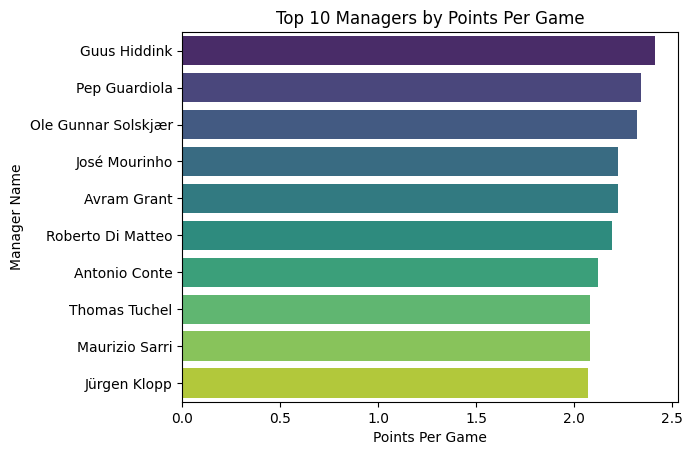

In [107]:
# Plot top 10 managers by PPG
top_10_ppg = top_ppg_managers.head(10)

sns.barplot(x='PPG', y='Manager_Name', data=top_10_ppg, palette='viridis')
plt.title('Top 10 Managers by Points Per Game')
plt.xlabel('Points Per Game')
plt.ylabel('Manager Name')
plt.show()

In [108]:
min_matches = 400  # For example, only include managers who have managed 10 or more matches

# Filter managers who meet the minimum matches threshold
df_filtered = df_new[df_new['Matches'] >= min_matches]

top_point_managers = df_filtered.sort_values(by='Points', ascending=False)

# Show top 10 managers by PPG
top_point_managers.head(10)

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG,Points
9,SAMUN15,MUN,Manchester United,Sir Alex Ferguson,"Nov 6, 1986","Jun 30, 2013",26 years 07 months 24 days,1490,895.0,323.0,272.0,2.02,3008.0
13,AWARS12,ARS,Arsenal,Arsène Wenger,"Oct 1, 1996","Jun 30, 2018",21 years 08 months 30 days,1234,715.0,267.0,252.0,1.95,2412.0
414,BCNFO11,NFO,Nottingham Forest,Brian Clough,"Jan 3, 1975","May 8, 1993",18 years 04 months 05 days,770,356.0,204.0,210.0,1.65,1272.0
79,PGMCI12,MCI,Manchester City,Pep Guardiola,"Jul 1, 2016",Still in job,08 years 03 months 02 days,482,356.0,60.0,66.0,2.34,1128.0
19,JKLIV11,LIV,Liverpool,Jürgen Klopp,"Oct 8, 2015","Jun 30, 2024",08 years 08 months 22 days,489,304.0,100.0,85.0,2.07,1012.0
106,DMEVE10,EVE,Everton,David Moyes,"Mar 14, 2002","Jun 30, 2013",11 years 03 months 16 days,518,221.0,133.0,164.0,1.54,796.0
18,GGARS12,ARS,Arsenal,George Graham,"May 14, 1986","Feb 21, 1995",08 years 09 months 07 days,420,197.0,124.0,99.0,1.70,715.0
369,ACCAT14,CAT,Charlton Athletic,Alan Curbishley,"Jul 24, 1991","Jun 30, 2006",14 years 11 months 06 days,460,177.0,114.0,169.0,1.40,645.0
372,SDBUR09,BUR,Burnley,Sean Dyche,"Oct 30, 2012","Apr 15, 2022",09 years 05 months 16 days,425,152.0,114.0,159.0,1.34,570.0


C:\Users\HP\AppData\Local\Temp\ipykernel_28180\1486921060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Points', y='Manager_Name', data=top_10_points_gained, palette='viridis')


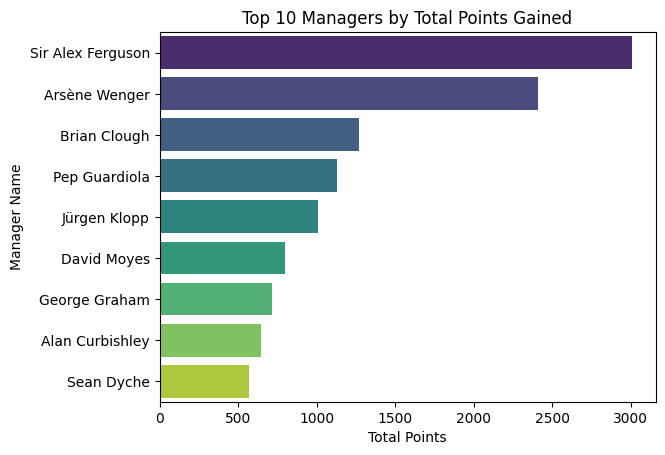

In [109]:
top_10_points_gained = top_point_managers.head(10)

sns.barplot(x='Points', y='Manager_Name', data=top_10_points_gained, palette='viridis')
plt.title('Top 10 Managers by Total Points Gained')
plt.xlabel('Total Points')
plt.ylabel('Manager Name')
plt.show()

In [110]:
df_new['Wins_Ratio'] = (df_new['Wins'] / df_new['Matches']).round(2)

df_new.fillna(0, inplace=True)

min_matches = 87.66  # For example, only include managers who have managed 10 or more matches

# Filter managers who meet the minimum matches threshold
df_filtered = df_new[df_new['Matches'] >= min_matches]

top_win_ratio_managers = df_filtered.sort_values(by='Wins_Ratio', ascending=False)

# Show top 10 managers by PPG
top_win_ratio_managers.head(10)

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG,Points,Wins_Ratio
79,PGMCI12,MCI,Manchester City,Pep Guardiola,"Jul 1, 2016",Still in job,08 years 03 months 02 days,482,356.0,60.0,66.0,2.34,1128.0,0.74
45,JMCHE12,CHE,Chelsea,José Mourinho,"Jul 1, 2004","Sep 20, 2007",03 years 02 months 20 days,185,124.0,38.0,23.0,2.22,410.0,0.67
34,ACCHE12,CHE,Chelsea,Antonio Conte,"Jul 1, 2016","Jul 13, 2018",02 years 12 days,106,70.0,15.0,21.0,2.12,225.0,0.66
31,TTCHE12,CHE,Chelsea,Thomas Tuchel,"Jan 26, 2021","Sep 7, 2022",01 year 07 months 12 days,100,63.0,19.0,18.0,2.08,208.0,0.63
41,CACHE14,CHE,Chelsea,Carlo Ancelotti,"Jul 1, 2009","May 22, 2011",01 year 10 months 21 days,109,68.0,17.0,24.0,2.03,221.0,0.62
19,JKLIV11,LIV,Liverpool,Jürgen Klopp,"Oct 8, 2015","Jun 30, 2024",08 years 08 months 22 days,489,304.0,100.0,85.0,2.07,1012.0,0.62
80,MPMCI16,MCI,Manchester City,Manuel Pellegrini,"Jul 1, 2013","Jun 30, 2016",02 years 11 months 30 days,166,101.0,27.0,38.0,1.99,330.0,0.61
10,MAARS11,ARS,Arsenal,Mikel Arteta,"Dec 22, 2019",Still in job,04 years 09 months 11 days,240,146.0,37.0,57.0,1.98,475.0,0.61
9,SAMUN15,MUN,Manchester United,Sir Alex Ferguson,"Nov 6, 1986","Jun 30, 2013",26 years 07 months 24 days,1490,895.0,323.0,272.0,2.02,3008.0,0.60
82,RMMCI14,MCI,Manchester City,Roberto Mancini,"Dec 19, 2009","May 13, 2013",03 years 04 months 24 days,191,113.0,38.0,40.0,1.97,377.0,0.59


In [111]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manager_ID    487 non-null    object 
 1   Team_ID       487 non-null    object 
 2   Team_Name     487 non-null    object 
 3   Manager_Name  487 non-null    object 
 4   Appointed     487 non-null    object 
 5   End of Time   487 non-null    object 
 6   Time in Post  487 non-null    object 
 7   Matches       487 non-null    int64  
 8   Wins          487 non-null    float64
 9   Draws         487 non-null    float64
 10  Losses        487 non-null    float64
 11  PPG           487 non-null    float64
 12  Points        487 non-null    float64
 13  Wins_Ratio    487 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 53.4+ KB


In [112]:
df_new['Manager_Name'] = df_new['Manager_Name'].apply(lambda x: unidecode.unidecode(x))
df_new.loc[df_new['Team_Name']=='Arsenal']

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG,Points,Wins_Ratio
10,MAARS11,ARS,Arsenal,Mikel Arteta,"Dec 22, 2019",Still in job,04 years 09 months 11 days,240,146.0,37.0,57.0,1.98,475.0,0.61
11,FLARS16,ARS,Arsenal,Freddie Ljungberg,"Nov 29, 2019","Dec 21, 2019",22 days,6,1.0,3.0,2.0,1.00,6.0,0.17
12,UEARS09,ARS,Arsenal,Unai Emery,"Jul 1, 2018","Nov 29, 2019",01 year 04 months 29 days,78,43.0,15.0,20.0,1.85,144.0,0.55
13,AWARS12,ARS,Arsenal,Arsene Wenger,"Oct 1, 1996","Jun 30, 2018",21 years 08 months 30 days,1234,715.0,267.0,252.0,1.95,2412.0,0.58
14,PRARS07,ARS,Arsenal,Pat Rice,"Sep 16, 1996","Sep 30, 1996",14 days,4,3.0,0.0,1.0,2.25,9.0,0.75
15,SHARS14,ARS,Arsenal,Stewart Houston,"Aug 12, 1996","Sep 13, 1996",01 month 01 day,5,1.0,2.0,2.0,1.00,5.0,0.20
16,BRARS10,ARS,Arsenal,Bruce Rioch,"Jul 1, 1995","Jun 30, 1996",11 months 30 days,47,22.0,15.0,10.0,1.72,81.0,0.47
17,SHARS14,ARS,Arsenal,Stewart Houston,"Feb 21, 1995","Jun 15, 1995",03 months 25 days,19,7.0,4.0,8.0,1.32,25.0,0.37
18,GGARS12,ARS,Arsenal,George Graham,"May 14, 1986","Feb 21, 1995",08 years 09 months 07 days,420,197.0,124.0,99.0,1.70,715.0,0.47


In [113]:
df_new['Appointed'] = pd.to_datetime(df_new['Appointed'], errors='coerce')
df_new['End of Time'] = pd.to_datetime(df_new['End of Time'].replace('Still in job', pd.Timestamp.today().date()), errors='coerce')

In [114]:
df_new.replace({'Eamonn Dolan +': 'Eamonn Dolan'}, inplace=True)

In [115]:
df_new.to_csv('Manager History.csv')

In [116]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Manager_ID    487 non-null    object        
 1   Team_ID       487 non-null    object        
 2   Team_Name     487 non-null    object        
 3   Manager_Name  487 non-null    object        
 4   Appointed     487 non-null    datetime64[ns]
 5   End of Time   487 non-null    datetime64[ns]
 6   Time in Post  487 non-null    object        
 7   Matches       487 non-null    int64         
 8   Wins          487 non-null    float64       
 9   Draws         487 non-null    float64       
 10  Losses        487 non-null    float64       
 11  PPG           487 non-null    float64       
 12  Points        487 non-null    float64       
 13  Wins_Ratio    487 non-null    float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(5)
memory usage: 53.4+ KB


In [117]:
df_new.loc[df_new['Team_Name']=='Norwich City']

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG,Points,Wins_Ratio
353,DSNCI09,NCI,Norwich City,Dean Smith,2021-11-15,2022-12-27,01 year 01 month 12 days,56,17.0,10.0,29.0,1.09,61.0,0.30
354,DFNCI11,NCI,Norwich City,Daniel Farke,2017-07-01,2021-11-06,04 years 04 months 06 days,208,88.0,47.0,73.0,1.50,311.0,0.42
355,ANNCI08,NCI,Norwich City,Alex Neil,2015-01-09,2017-03-10,02 years 02 months 01 day,108,45.0,21.0,42.0,1.44,156.0,0.42
356,NANCI09,NCI,Norwich City,Neil Adams,2014-04-06,2015-01-05,08 months 30 days,32,11.0,8.0,13.0,1.28,41.0,0.34
357,CHNCI12,NCI,Norwich City,Chris Hughton,2012-06-07,2014-04-06,01 year 09 months 30 days,82,24.0,23.0,35.0,1.16,95.0,0.29
358,PLNCI11,NCI,Norwich City,Paul Lambert,2009-08-19,2012-06-01,02 years 09 months 13 days,140,71.0,33.0,36.0,1.76,246.0,0.51
359,NWNCI16,NCI,Norwich City,Nigel Worthington,2001-01-02,2006-10-01,05 years 08 months 29 days,271,111.0,58.0,102.0,1.44,391.0,0.41
360,GMNCI10,NCI,Norwich City,Gary Megson,1995-04-09,1995-06-30,02 months 21 days,0,0.0,0.0,0.0,0.00,0.0,0.00
361,JDNCI10,NCI,Norwich City,John Deehan,1994-01-07,1995-04-09,01 year 03 months 02 days,59,12.0,23.0,24.0,1.00,59.0,0.20
362,MWNCI10,NCI,Norwich City,Mike Walker,1992-07-01,1994-01-06,01 year 06 months 06 days,74,33.0,19.0,22.0,1.59,118.0,0.45


In [118]:
df_new.loc[df_new['Team_Name']=='Queens Park Rangers']

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG,Points,Wins_Ratio
396,CRQPA11,QPA,Queens Park Rangers,Chris Ramsey,2015-05-19,2015-11-04,05 months 16 days,18,6.0,4.0,8.0,1.22,22.0,0.33
397,CRQPA11,QPA,Queens Park Rangers,Chris Ramsey,2015-02-04,2015-05-18,03 months 14 days,14,3.0,2.0,9.0,0.79,11.0,0.21
398,HRQPA13,QPA,Queens Park Rangers,Harry Redknapp,2012-11-25,2015-02-03,02 years 02 months 09 days,105,36.0,26.0,43.0,1.28,134.0,0.34
399,MHQPA10,QPA,Queens Park Rangers,Mark Hughes,2012-01-10,2012-11-23,10 months 13 days,34,8.0,6.0,20.0,0.88,30.0,0.24
400,NWQPA11,QPA,Queens Park Rangers,Neil Warnock,2010-03-01,2012-01-08,01 year 10 months 10 days,84,33.0,27.0,24.0,1.50,126.0,0.39
401,RWQPA10,QPA,Queens Park Rangers,Ray Wilkins,1994-11-15,1996-09-04,01 year 09 months 20 days,74,26.0,12.0,36.0,1.22,90.0,0.35
402,GFQPA12,QPA,Queens Park Rangers,Gerry Francis,1991-06-01,1994-11-11,03 years 05 months 10 days,141,48.0,45.0,48.0,1.34,189.0,0.34


In [119]:
pyg.walk(df_new, dark='light')

Box(children=(HTML(value='\n<div id="ifr-pyg-0006239089bfcad2n1hdAzvNfoCwPTKk" style="height: auto">\n    <hea…

In [120]:
df_new.loc[df_new['Team_Name']=='West Bromwich Albion']

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG,Points,Wins_Ratio
311,SAWBR12,WBR,West Bromwich Albion,Sam Allardyce,2020-12-16,2021-06-30,06 months 14 days,26,4.0,7.0,15.0,0.73,19.0,0.15
312,SBWBR11,WBR,West Bromwich Albion,Slaven Bilic,2019-07-01,2020-12-16,01 year 05 months 15 days,65,26.0,21.0,18.0,1.52,99.0,0.40
313,DMWBR11,WBR,West Bromwich Albion,Darren Moore,2018-04-02,2019-03-09,11 months 07 days,48,23.0,13.0,12.0,1.71,82.0,0.48
314,APWBR10,WBR,West Bromwich Albion,Alan Pardew,2017-11-29,2018-04-02,04 months 04 days,21,3.0,5.0,13.0,0.67,14.0,0.14
315,GMWBR10,WBR,West Bromwich Albion,Gary Megson,2017-11-20,2017-11-29,09 days,2,0.0,2.0,0.0,1.00,2.0,0.00
316,TPWBR09,WBR,West Bromwich Albion,Tony Pulis,2015-01-01,2017-11-20,02 years 10 months 19 days,121,38.0,33.0,50.0,1.21,147.0,0.31
317,RKWBR08,WBR,West Bromwich Albion,Rob Kelly,2014-12-30,2015-01-01,02 days,1,0.0,1.0,0.0,1.00,1.0,0.00
318,AIWBR10,WBR,West Bromwich Albion,Alan Irvine,2014-07-01,2014-12-29,05 months 28 days,22,6.0,5.0,11.0,1.05,23.0,0.27
319,PMWBR07,WBR,West Bromwich Albion,Pepe Mel,2014-01-09,2014-05-12,04 months 03 days,17,3.0,6.0,8.0,0.88,15.0,0.18
320,KDWBR12,WBR,West Bromwich Albion,Keith Downing,2013-12-14,2014-01-02,19 days,4,1.0,3.0,0.0,1.50,6.0,0.25


In [121]:
df_new.head()

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG,Points,Wins_Ratio
0,EtMUN10,MUN,Manchester United,Erik ten Hag,2022-07-01,2024-10-03,02 years 03 months 02 days,123,71.0,17.0,35.0,1.87,230.0,0.58
1,RRMUN12,MUN,Manchester United,Ralf Rangnick,2021-12-03,2022-05-31,05 months 28 days,29,11.0,9.0,9.0,1.45,42.0,0.38
2,MCMUN14,MUN,Manchester United,Michael Carrick,2021-11-21,2021-12-03,12 days,3,2.0,1.0,0.0,2.33,7.0,0.67
3,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjaer,2019-03-28,2021-11-21,02 years 07 months 24 days,149,78.0,33.0,38.0,1.79,267.0,0.52
4,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjaer,2018-12-19,2019-03-28,03 months 09 days,19,14.0,2.0,3.0,2.32,44.0,0.74


In [122]:
df_matches = pd.read_csv("EPL Matches 1992_1993_2023_2024.csv", index_col=0)

In [123]:
def map_manager_seasons(manager_history_df, matches_df):
    # Create a dictionary to store seasons for each manager
    manager_season_map = {}

    # Iterate through each manager in the manager history dataframe
    for manager_id in manager_history_df['Manager_ID'].unique():
        # Get the seasons where the manager appears in home matches
        home_seasons = matches_df.loc[matches_df['Manager_Home_ID'] == manager_id, 'Season'].unique()

        # Get the seasons where the manager appears in away matches
        away_seasons = matches_df.loc[matches_df['Manager_Away_ID'] == manager_id, 'Season'].unique()

        # Combine and deduplicate the seasons
        all_seasons = sorted(set(home_seasons).union(set(away_seasons)))

        # Add the seasons to the dictionary for this manager
        manager_season_map[manager_id] = all_seasons

    # Define a function to apply to each manager in the dataframe
    def get_manager_seasons(manager_id):
        return manager_season_map.get(manager_id, [])

    # Apply the function to the Manager_ID column to create a new 'Seasons' column
    manager_history_df['Seasons'] = manager_history_df['Manager_ID'].apply(get_manager_seasons)

    return manager_history_df

In [124]:
manager_history_df = map_manager_seasons(df_new, df_matches)

In [125]:
manager_history_df.head()

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG,Points,Wins_Ratio,Seasons
0,EtMUN10,MUN,Manchester United,Erik ten Hag,2022-07-01,2024-10-03,02 years 03 months 02 days,123,71.0,17.0,35.0,1.87,230.0,0.58,"[2022/2023, 2023/2024]"
1,RRMUN12,MUN,Manchester United,Ralf Rangnick,2021-12-03,2022-05-31,05 months 28 days,29,11.0,9.0,9.0,1.45,42.0,0.38,[2021/2022]
2,MCMUN14,MUN,Manchester United,Michael Carrick,2021-11-21,2021-12-03,12 days,3,2.0,1.0,0.0,2.33,7.0,0.67,[2021/2022]
3,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjaer,2019-03-28,2021-11-21,02 years 07 months 24 days,149,78.0,33.0,38.0,1.79,267.0,0.52,"[2018/2019, 2019/2020, 2020/2021, 2021/2022]"
4,OGMUN17,MUN,Manchester United,Ole Gunnar Solskjaer,2018-12-19,2019-03-28,03 months 09 days,19,14.0,2.0,3.0,2.32,44.0,0.74,"[2018/2019, 2019/2020, 2020/2021, 2021/2022]"


In [126]:
manager_history_df.tail()

,Manager_ID,Team_ID,Team_Name,Manager_Name,Appointed,End of Time,Time in Post,Matches,Wins,Draws,Losses,PPG,Points,Wins_Ratio,Seasons
482,DWHTO11,HTO,Huddersfield Town,David Wagner,2015-11-09,2019-01-14,03 years 02 months 05 days,154,53.0,31.0,70.0,1.23,190.0,0.34,"[2017/2018, 2018/2019]"
483,DWBAR11,BAR,Barnsley,Danny Wilson,1994-06-02,1998-07-05,04 years 01 month 03 days,100,38.0,22.0,40.0,1.36,136.0,0.38,[1997/1998]
484,IHBLA11,BLA,Blackpool,Ian Holloway,2009-07-01,2012-11-03,03 years 04 months 03 days,161,62.0,42.0,57.0,1.42,228.0,0.39,[2010/2011]
485,RELTO10,LTO,Luton Town,Rob Edwards,2022-11-17,2024-10-03,01 year 10 months 16 days,85,28.0,21.0,36.0,1.24,105.0,0.33,[2023/2024]
486,JGSTO10,STO,Swindon Town,John Gorman,1993-07-01,1994-11-21,01 year 04 months 21 days,42,5.0,15.0,22.0,0.71,30.0,0.12,[1993/1994]


In [127]:
manager_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Manager_ID    487 non-null    object        
 1   Team_ID       487 non-null    object        
 2   Team_Name     487 non-null    object        
 3   Manager_Name  487 non-null    object        
 4   Appointed     487 non-null    datetime64[ns]
 5   End of Time   487 non-null    datetime64[ns]
 6   Time in Post  487 non-null    object        
 7   Matches       487 non-null    int64         
 8   Wins          487 non-null    float64       
 9   Draws         487 non-null    float64       
 10  Losses        487 non-null    float64       
 11  PPG           487 non-null    float64       
 12  Points        487 non-null    float64       
 13  Wins_Ratio    487 non-null    float64       
 14  Seasons       487 non-null    object        
dtypes: datetime64[ns](2), float64(6), int64(

In [128]:
manager_history_df.to_csv('Final Manager History.csv')